In [1]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 8.2MB/s 


In [2]:
import os
import sys

from google.colab import drive

drive.mount('/content/drive')
IMAGES_DIR = '/content/drive/My Drive/Neural/dataset/stage_2_train_images'
LABELS_CSV = '/content/drive/My Drive/Neural/dataset/stage_2_train_labels.csv'
CLASS_INFO_CSV = '/content/drive/My Drive/Neural/dataset/stage_2_detailed_class_info.csv'

print(IMAGES_DIR)
print(LABELS_CSV)
print(CLASS_INFO_CSV)

Mounted at /content/drive
/content/drive/My Drive/Neural/dataset/stage_2_train_images
/content/drive/My Drive/Neural/dataset/stage_2_train_labels.csv
/content/drive/My Drive/Neural/dataset/stage_2_detailed_class_info.csv


## CSVs analysis

#### Train labels CSV analysis  

In [3]:
import numpy as np
import pandas as pd

In [4]:
train_labels_df = pd.read_csv(LABELS_CSV)
print(train_labels_df.count())
train_labels_df[:10]

patientId    30227
x             9555
y             9555
width         9555
height        9555
Target       30227
dtype: int64


,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [5]:
print("Unique patientId in train_labels_df: ", train_labels_df['patientId'].nunique()) 

Unique patientId in train_labels_df:  26684


In [6]:
duplicateRowsDF = train_labels_df[train_labels_df.duplicated(['patientId'], keep=False)]
print(duplicateRowsDF[0:10])
duplicateRowsDF_num = train_labels_df[train_labels_df.duplicated(['patientId'])] #cause with false we take also the first occurence 
print('\n The total number of duplicates is: ', len(duplicateRowsDF_num))

                               patientId      x      y  width  height  Target
4   00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5   00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
8   00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1
9   00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1
14  00aecb01-a116-45a2-956c-08d2fa55433f  288.0  322.0   94.0   135.0       1
15  00aecb01-a116-45a2-956c-08d2fa55433f  547.0  299.0  119.0   165.0       1
16  00c0b293-48e7-4e16-ac76-9269ba535a62  306.0  544.0  168.0   244.0       1
17  00c0b293-48e7-4e16-ac76-9269ba535a62  650.0  511.0  206.0   284.0       1
19  00f08de1-517e-4652-a04f-d1dc9ee48593  181.0  184.0  206.0   506.0       1
20  00f08de1-517e-4652-a04f-d1dc9ee48593  571.0  275.0  230.0   476.0       1

 The total number of duplicates is:  3543


Therefore, there are 3543 duplicates (referring to more bounging boxes) for the same patient

#### Class info CSV analysis

In [7]:
class_info_df = pd.read_csv(CLASS_INFO_CSV)
print(class_info_df.count())
class_info_df[:10]

patientId    30227
class        30227
dtype: int64


,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [8]:
print("Unique patientId in train_labels_df: ", class_info_df['patientId'].nunique()) 

Unique patientId in train_labels_df:  26684


In [9]:
duplicateRowsDF = class_info_df[class_info_df.duplicated(['patientId'], keep=False)]
print(duplicateRowsDF[0:10])

duplicateRowsDF_num = class_info_df[class_info_df.duplicated(['patientId'])] #cause with false we take also the first occurence 
print('\n The total number of duplicates is: ', len(duplicateRowsDF_num))

                               patientId         class
4   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
5   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
8   00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
9   00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
14  00aecb01-a116-45a2-956c-08d2fa55433f  Lung Opacity
15  00aecb01-a116-45a2-956c-08d2fa55433f  Lung Opacity
16  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
17  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
19  00f08de1-517e-4652-a04f-d1dc9ee48593  Lung Opacity
20  00f08de1-517e-4652-a04f-d1dc9ee48593  Lung Opacity

 The total number of duplicates is:  3543


We can find the same behaviour also in the second csv file

#### Merged dataset

In [10]:
train_class_df = train_labels_df.merge(class_info_df, left_on='patientId', right_on='patientId', how='inner')
print(train_class_df.count())
train_class_df[:10]

patientId    37629
x            16957
y            16957
width        16957
height       16957
Target       37629
class        37629
dtype: int64


,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
6,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
7,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
8,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
9,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal


We need to remove the full duplicates made by merge

In [11]:
train_class_df = train_class_df.drop_duplicates()
print(train_class_df.count())
train_class_df[:20]

patientId    30227
x             9555
y             9555
width         9555
height        9555
Target       30227
class        30227
dtype: int64


,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
6,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
8,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
9,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
10,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity
12,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity


Note: both 'No lung opacity / Not normal' and 'Normal' have target 0

Now, let's find the distribution of patientId duplicates, corresponding to more bouinding boxes 

In [12]:
tmp = train_class_df.groupby(['patientId', 'Target', 'class'])['patientId'].count()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df.groupby(['Exams','Target','class']).count()
df2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
df2.columns = ['# Exams', 'Target','Class', '# Entries']
print('Duplicates:')
df2

Duplicates:


,# Exams,Target,Class,# Entries
0,1,0,No Lung Opacity / Not Normal,11821
1,1,0,Normal,8851
2,1,1,Lung Opacity,2614
3,2,1,Lung Opacity,3266
4,3,1,Lung Opacity,119
5,4,1,Lung Opacity,13


## Class distribution

In [13]:
import matplotlib.pyplot as plt

import seaborn as sns

In [14]:
class_info = class_info_df["class"].value_counts()
print(class_info)

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64


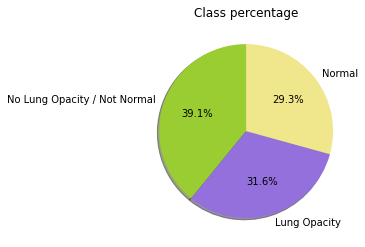

In [15]:
labels = (np.array(class_info.index))
sizes = (np.array((class_info / class_info.sum())*100))
colors = ['yellowgreen', 'mediumpurple','khaki']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Class percentage")
plt.show()

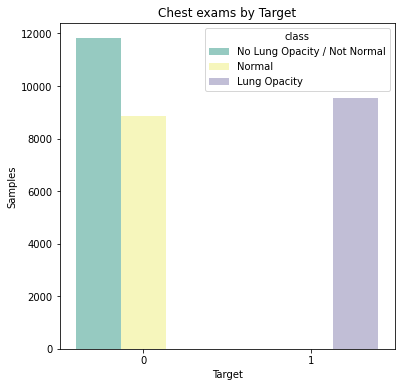

In [16]:
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
tmp = train_class_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Samples': tmp.values}, index=tmp.index).reset_index()

sns.barplot(ax=ax, x='Target', y='Samples', hue='class', data=df, palette='Set3')
plt.title("Chest exams by Target")
plt.show()

## Sample images

In [17]:
import pydicom as dcm

In [18]:
listdir = os.listdir(IMAGES_DIR)

number_files = len(listdir)
print('Image files: ', number_files)
print('Examples: \n', listdir[:5])

Image files:  26718
Examples: 
 ['f73a6f8a-40b3-4079-85ab-a2e155903ee4.dcm', 'f7cb30d5-3102-46c2-a66d-6af7a147b51a.dcm', 'f6cd2ddd-4708-469c-9c48-a7219e2a2965.dcm', 'f70fe0f0-7fbc-4614-9305-4861196b1143.dcm', 'f7b0889e-a9fe-40a9-a6a3-c9ce53252ec4.dcm']


Sample image metadata

In [19]:
samplePatientID = list(train_class_df[:2].T.to_dict().values())[0]['patientId']
samplePatientID = samplePatientID+'.dcm'
dicom_file_path = os.path.join(IMAGES_DIR,samplePatientID)
dicom_file_dataset = dcm.read_file(dicom_file_path)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

Sample images from different classes

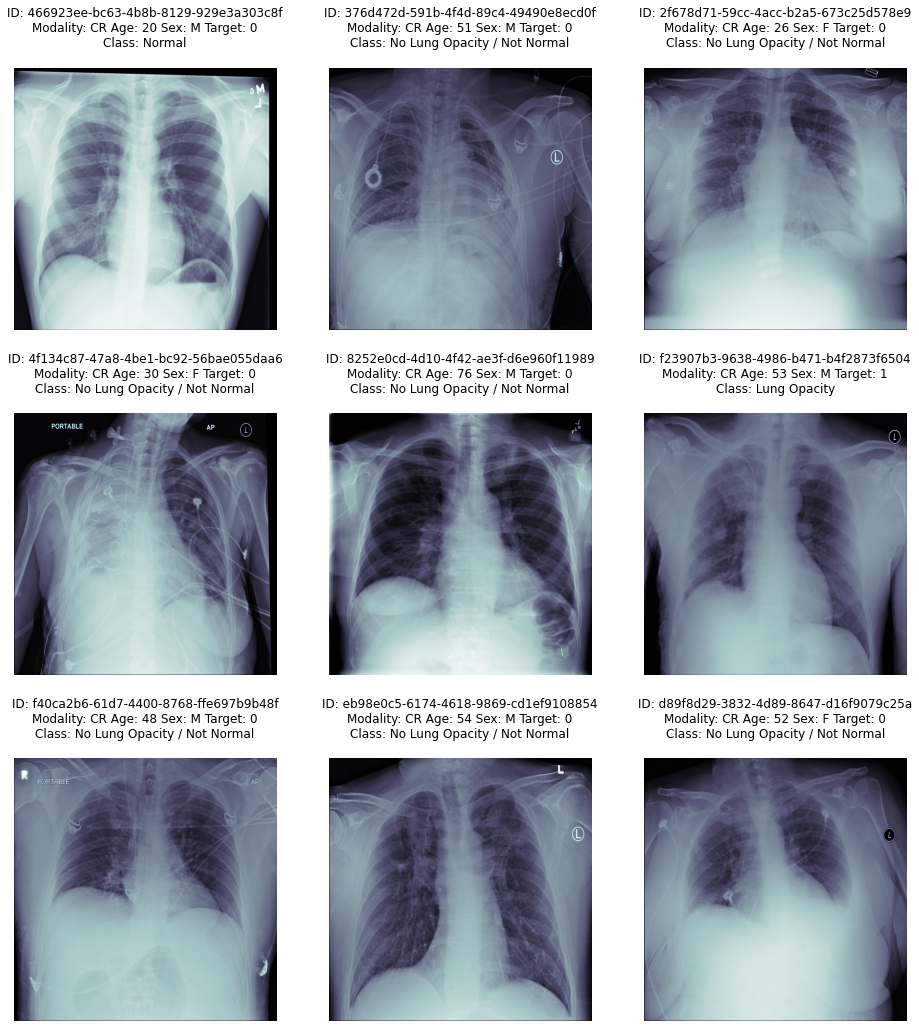

In [20]:
def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join(IMAGES_DIR , patientImage)
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\n'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class']))
    plt.show()

show_dicom_images(train_class_df.sample(9))

Sample images from only 'Lung opacity' samples with corresponding boundig boxes

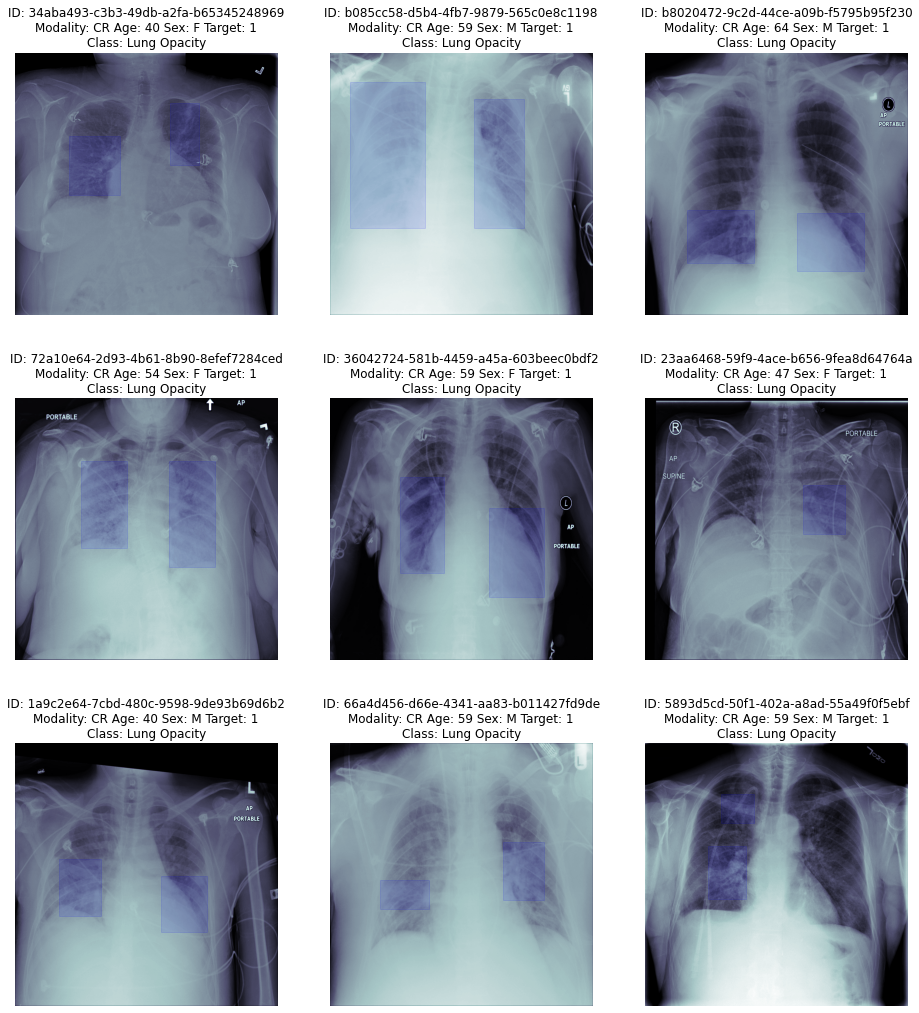

In [21]:
from matplotlib.patches import Rectangle

def show_dicom_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join(IMAGES_DIR, patientImage)
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        rows = train_class_df[train_class_df['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        color="blue",alpha = 0.1))   
    plt.show()

show_dicom_images_with_boxes(train_class_df[train_class_df['Target']==1].sample(9))

## Bounding boxes analysis

Text(0.5, 1.0, 'Bounding boxes location\n\n')

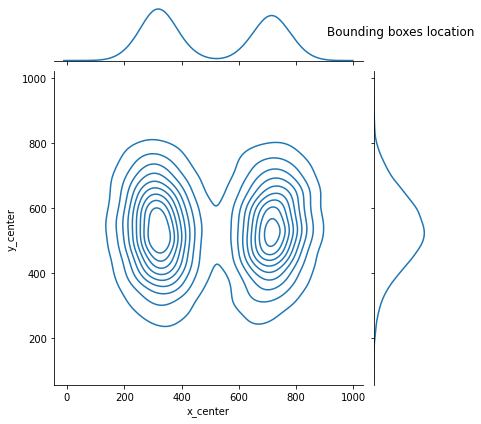

In [22]:
train_class_df['x_center'] = train_class_df['x'] + train_class_df['width']/2
train_class_df['y_center'] = train_class_df['y'] + train_class_df['height']/2

# Plot x and y centers
sns.jointplot(x="x_center", y="y_center", kind="kde", data=train_class_df, dropna=True)
plt.title('Bounding boxes location\n\n')

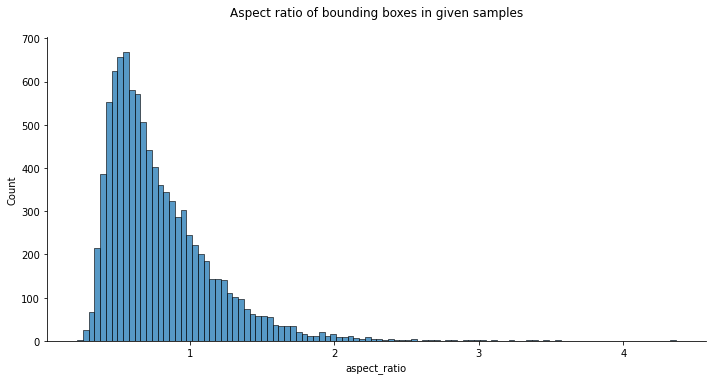

In [23]:
train_class_df['aspect_ratio'] = train_class_df['width']/train_class_df['height']

sns.displot(train_class_df['aspect_ratio'].dropna(), height=5, aspect=2)
plt.title('Aspect ratio of bounding boxes in given samples\n')
plt.show()

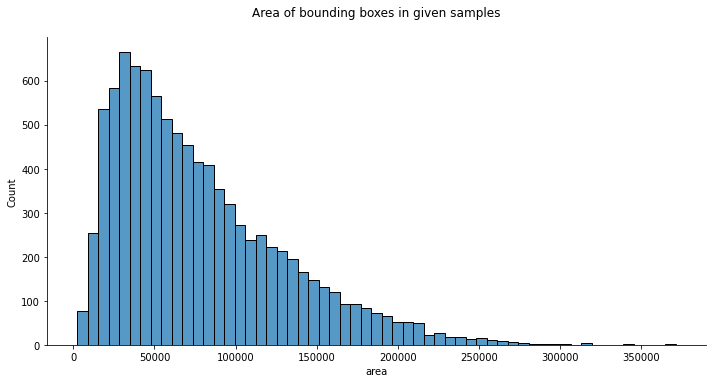

In [24]:
train_class_df['area'] = train_class_df['width']*train_class_df['height']

sns.displot(train_class_df['area'].dropna(), height=5, aspect=2)
plt.title('Area of bounding boxes in given samples\n')
plt.show()

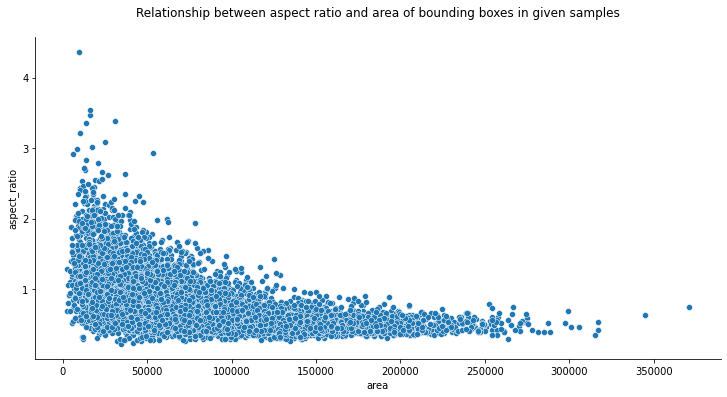

In [25]:
sns.relplot(x='area', y='aspect_ratio', data=train_class_df, height=5, aspect=2)
plt.title('Relationship between aspect ratio and area of bounding boxes in given samples\n')
plt.show()

Let's plot the density of x, y, width and height.

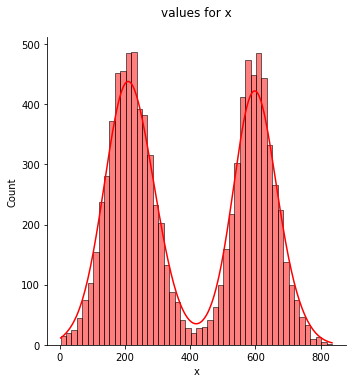

In [26]:
target1 = train_class_df[train_class_df['Target']==1]

sns.displot(target1['x'],kde=True,bins=50, color="red")
plt.title('values for x\n')
plt.show()

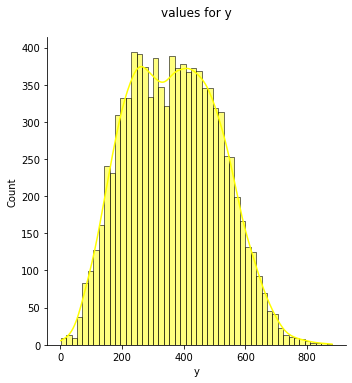

In [27]:
sns.displot(target1['y'],kde=True,bins=50, color="yellow")
plt.title('values for y\n')
plt.show()

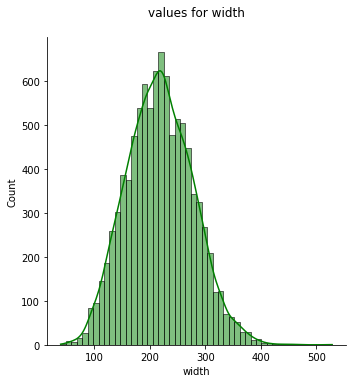

In [28]:
sns.displot(target1['width'],kde=True,bins=50, color="green")
plt.title('values for width\n')
plt.show()

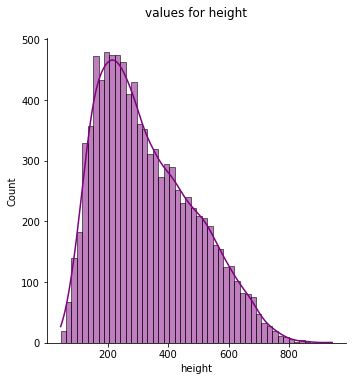

In [29]:
sns.displot(target1['height'],kde=True,bins=50, color="purple")
plt.title('values for height\n')
plt.show()